# WEB SCRAPING - Assignment 6

In [1]:
import pandas as pd
from pprint import pprint
from selenium import webdriver
from IPython.display import Image
import chromedriver_autoinstaller
from selenium.webdriver.common.by import By

## 1) 60 points

In [2]:
url = 'https://www.linkedin.com/jobs/search/?currentJobId=3532460530'
option = webdriver.ChromeOptions()
option.add_argument('--headless')
driver = webdriver.Chrome(options=option)
driver.get(url)

__A)__

In [3]:
# Extracting the titles/roles of all the jobs listed on the page
roles = list()
role = driver.find_elements(By.XPATH, '//ul[@class="jobs-search__results-list"]/li/div/a')
for i in role:
    roles.append(i.text)
    
roles

['Certified Medical Assistant, Peds Endocrinology',
 'Registered Nurse (RN) - Ambulatory, Procedure Ste',
 'Client Service Representative - Urgent Care',
 'Full Time Client Service Representative',
 'Assistant Hospital Manager',
 'Client Service Representative',
 'Elementary School Second Grade Teacher',
 'Biologist (Structural Biology) - NIH',
 'Certified Medical Assistant APP (OB Services)',
 'Sales Representative - Earn Over $100k',
 'Veterinary Receptionist',
 'Veterinary Receptionist',
 'Registered Nurse (RN)',
 'Veterinary Receptionist',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Client Service Representative',
 'Stacker (1st & 2nd Shift)',
 'Administrative Assistant, Office of the CEO']

__B)__

In [4]:
# Fetching the name of companies on the given page
companies = list()
company = driver.find_elements(By.XPATH, '//ul[@class="jobs-search__results-list"]/li/div/div[2]/h4/a')
for i in company:
    companies.append(i.text)
    
companies

['Atlantic Health System',
 'Northwell Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'ARCHULETA SCHOOL DIST 50 JOINT',
 'Kelly',
 'Asante',
 'SitePro Rentals',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Infirmary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Mars Veterinary Health',
 'Dole Food Company',
 'Jefferies']

__C)__

In [5]:
# Fetching the location of all the jobs posted on the given page
locations = []
location = driver.find_elements(By.XPATH, '//ul[@class="jobs-search__results-list"]/li/div/div[2]/div//span[@class="job-search-card__location"]')
for i in location:
    locations.append(i.text)
    
locations

['Morristown, NJ',
 'Katonah, NY',
 'Cedar Park, TX',
 'Los Gatos, CA',
 'Bakersfield, CA',
 'Laguna Niguel, CA',
 'Pagosa Springs, CO',
 'Bethesda, MD',
 'Ashland, OR',
 'Lebanon, GA',
 'Fleming Island, FL',
 'Jacksonville, FL',
 'Fairhope, AL',
 'Spokane, WA',
 'Massachusetts, United States',
 'South Miami, FL',
 'Miami Beach, FL',
 'Collinsville, OK',
 'Cape Coral, FL',
 'West Hartford, CT',
 'West Hartford, CT',
 'Denver, CO',
 'Overland Park, KS',
 'Bessemer City, NC',
 'New York, NY']

__D)__

In [6]:
# Cannot fetch the ranking of the company in this case as it is not available on LinkedIn

__E)__

In [7]:
# Fetching the date the job was posted
dates = list()
date = driver.find_elements(By.XPATH,'//ul[@class="jobs-search__results-list"]/li/div/div[2]/div//time')
for i in date:
    dates.append((i.get_attribute('datetime'), i.text))
    
dates

[('2023-03-22', '3 weeks ago'),
 ('2023-04-01', '2 weeks ago'),
 ('2023-03-31', '2 weeks ago'),
 ('2023-04-07', '1 week ago'),
 ('2023-04-07', '1 week ago'),
 ('2023-03-31', '2 weeks ago'),
 ('2023-04-16', '1 day ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-04-10', '1 week ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-23', '3 weeks ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-03-22', '3 weeks ago'),
 ('2023-03-22', '3 weeks ago')]

__F)__

In [8]:
# Creating the dataframe
df = pd.DataFrame(columns=['Job title', 'Company', 'Location of the job', 'Ranking', 'Date', 'Employment type'])
df['Job title'] = roles
df['Company'] = companies
df['Location of the job'] = locations
df['Date'] = dates

In [9]:
# Put the data you extracted from A to E in these columns if the job is "Full-time"
jobs = driver.find_elements(By.XPATH, '//ul[@class="jobs-search__results-list"]/li/div/a')
employment_types = list()
employment_type = list()
count = 0

for i in jobs:
    urls = i.get_attribute('href')
    employment_types.append(urls)

while count < len(employment_types):
    driver.refresh()
    driver.get(employment_types[count])
    try:
        emp_type = driver.find_element(By.XPATH, '//ul/li[2]/span')
        employment_type.append(emp_type.text)
    except Exception as e:
        emp_type.append('NULL')
    count+=1
    driver.delete_all_cookies()
    
df['Employment type'] = emp_type
df_fulltime = df[df['Employment type'] == 'Full-time']
del df_fulltime['Employment type']

In [10]:
df_fulltime

,Job title,Company,Location of the job,Ranking,Date
0,"Certified Medical Assistant, Peds Endocrinology",Atlantic Health System,"Morristown, NJ",NaN,"(2023-03-22, 3 weeks ago)"
1,"Registered Nurse (RN) - Ambulatory, Procedure Ste",Northwell Health,"Katonah, NY",NaN,"(2023-04-01, 2 weeks ago)"
2,Client Service Representative - Urgent Care,Mars Veterinary Health,"Cedar Park, TX",NaN,"(2023-03-31, 2 weeks ago)"
3,Full Time Client Service Representative,Mars Veterinary Health,"Los Gatos, CA",NaN,"(2023-04-07, 1 week ago)"
4,Assistant Hospital Manager,Mars Veterinary Health,"Bakersfield, CA",NaN,"(2023-04-07, 1 week ago)"
5,Client Service Representative,Mars Veterinary Health,"Laguna Niguel, CA",NaN,"(2023-03-31, 2 weeks ago)"
6,Elementary School Second Grade Teacher,ARCHULETA SCHOOL DIST 50 JOINT,"Pagosa Springs, CO",NaN,"(2023-04-16, 1 day ago)"
7,Biologist (Structural Biology) - NIH,Kelly,"Bethesda, MD",NaN,"(2023-03-22, 3 weeks ago)"
8,Certified Medical Assistant APP (OB Services),Asante,"Ashland, OR",NaN,"(2023-04-10, 1 week ago)"
9,Sales Representative - Earn Over $100k,SitePro Rentals,"Lebanon, GA",NaN,"(2023-03-22, 3 weeks ago)"


In [11]:
df.to_csv('job_1.csv')

## 2) 20 points

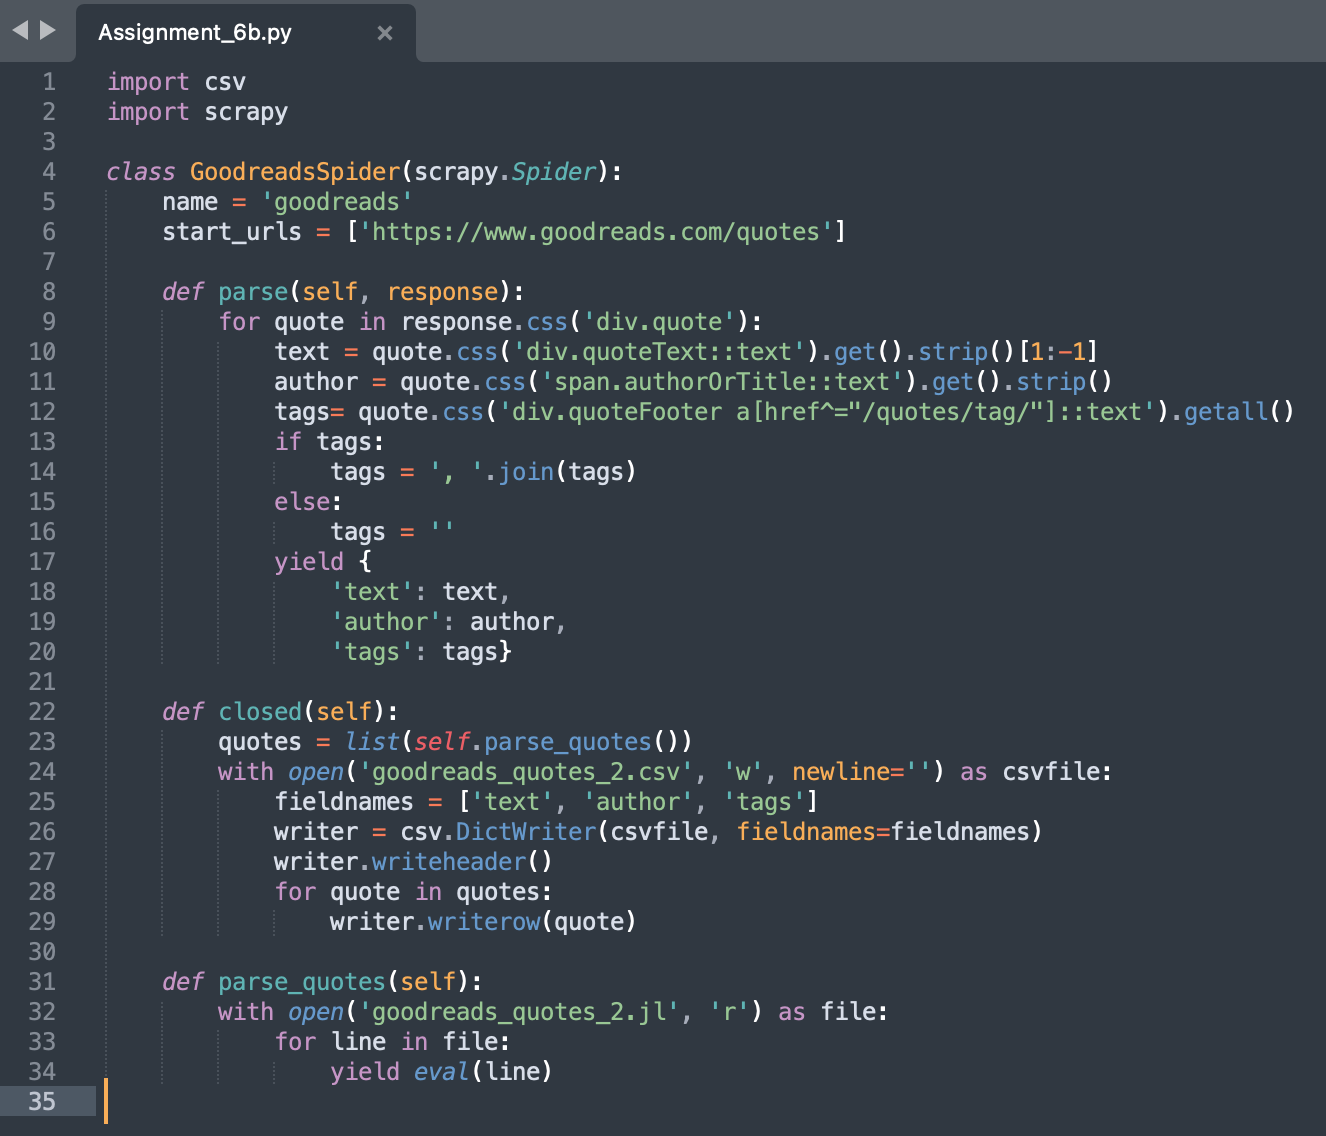

In [12]:
# I will be using goodreads website for this question as the professor has 
# suggested to use this website for question 2 and 3 in the Q&A community (InScribe)

# Used the following terminal command to execute the python program:
# scrapy runspider Assignment_6b.py -o job_2.csv

Image(filename='/Users/varsha/Desktop/Sem 4/Web scraping/Assignment 6/6b.png') 

## 3) 20 points

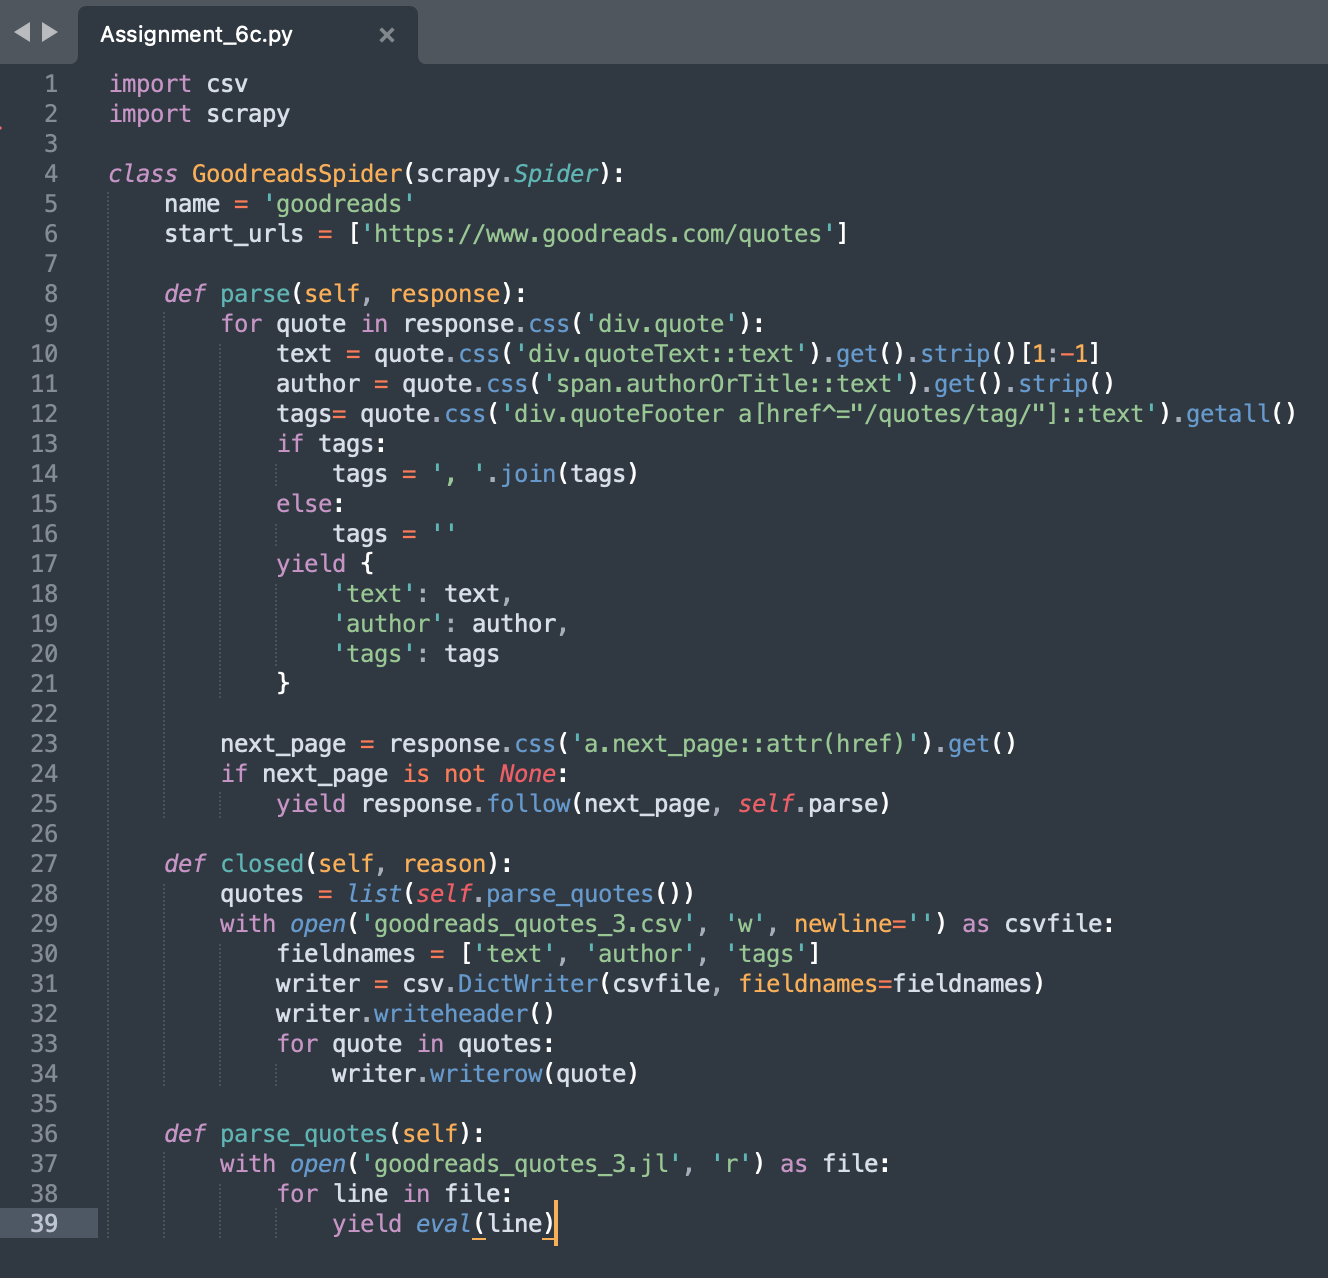

In [13]:
# Used the following terminal command to execute the python program:
# scrapy runspider Assignment_6c.py -o job_3.csv

Image(filename='/Users/varsha/Desktop/Sem 4/Web scraping/Assignment 6/6c.png') 